## TamilSentimentAnalysis

In [1]:
!pip install wordcloud

In [2]:
!pip install scikit-plot

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:
df = pd.read_csv('Tamil_first_ready_for_sentiment.csv',sep='\t')
df.reset_index(inplace=True,drop=True)
print(df.shape)

(15743, 2)


In [6]:
df.columns =['Category','Text']

In [7]:
df.head(10)

,Category,Text
0,Negative,This movei is just like ellam avan seyal
1,Positive,Padam vanthathum 13k dislike pottavaga yellam...
2,Positive,Neraya neraya neraya... ... V era level...thala
3,Positive,wow thavala sema mass....padam oru pundaikum ...
4,Negative,Andha 19 k unlike panavangaluku kolandha pora...
5,Positive,Yaarellam frst like pottutu video paaka start...
6,Positive,Ethana padam vanthanu SALT AND PEPPER Mattum ...
7,Positive,Thala mass Hvy sprt kerala Surya anna fans
8,Negative,Elam avan jayal movie remake pa
9,Positive,Dhayavasenju indha padathula mass ila mayiru ...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15743 entries, 0 to 15742
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  15743 non-null  object
 1   Text      15743 non-null  object
dtypes: object(2)
memory usage: 246.1+ KB


In [9]:
df.describe

<bound method NDFrame.describe of               Category                                               Text
0            Negative           This movei is just like  ellam avan seyal
1            Positive    Padam vanthathum 13k dislike pottavaga yellam...
2            Positive     Neraya neraya neraya... ... V era level...thala
3            Positive    wow thavala sema mass....padam oru pundaikum ...
4            Negative    Andha 19 k unlike panavangaluku kolandha pora...
...                ...                                                ...
15738  Mixed_feelings    ivaru cinemala laam nalla tha prasuraaru...aa...
15739        Positive    Pattaya Kilaputhupaa trailer... !!!!! Get Raj...
15740  Mixed_feelings    En innum trending la varala? Ennada panringa ...
15741       not-Tamil          Rajnikant sir plz aap india ke pm ban jaao
15742  Mixed_feelings    Enagada YouTube inum trending la add panama i...

[15743 rows x 2 columns]>

In [10]:
df.describe()

,Category,Text
count,15743,15743
unique,5,15577
top,Positive,Graphics sari illa nu solrathukune oru gang s...
freq,10559,8


In [11]:
df.isnull().any()

Category    False
Text        False
dtype: bool

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

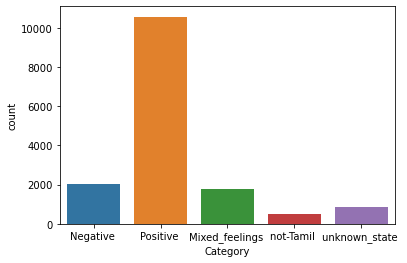

In [12]:
sns.countplot(df.Category)

In [13]:
df['Category'].value_counts()

Positive           10559
Negative            2036
Mixed_feelings      1801
unknown_state        850
not-Tamil            497
Name: Category, dtype: int64

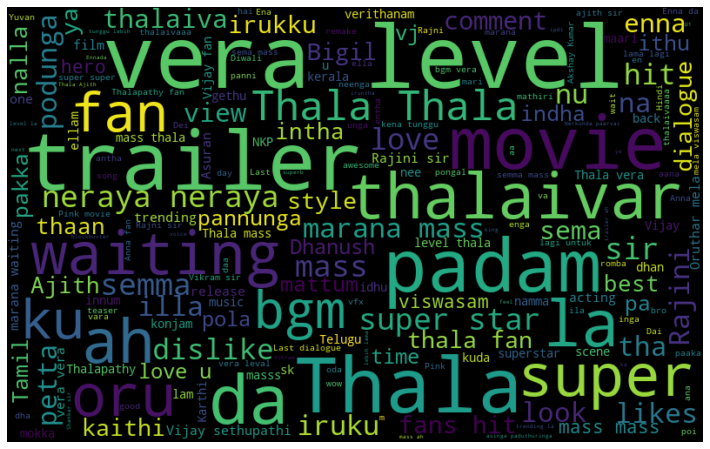

In [14]:
#visualize the frequent words
all_words = " ".join([sentence for sentence in df['Text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
df.columns

Index(['Category', 'Text'], dtype='object')

In [16]:
for i in df['Category']:
  print(i)
  break

Negative 


In [26]:
df['Category']=='Negative '

0         True
1        False
2        False
3        False
4         True
         ...  
15738    False
15739    False
15740    False
15741    False
15742    False
Name: Category, Length: 15743, dtype: bool

In [17]:
df1 = df.loc[(df['Category'] == 'Negative ') | (df['Category'] == 'Positive ')]

In [18]:
df1

,Category,Text
0,Negative,This movei is just like ellam avan seyal
1,Positive,Padam vanthathum 13k dislike pottavaga yellam...
2,Positive,Neraya neraya neraya... ... V era level...thala
3,Positive,wow thavala sema mass....padam oru pundaikum ...
4,Negative,Andha 19 k unlike panavangaluku kolandha pora...
...,...,...
15731,Positive,Looking young rajini Anna Fans from Telangana
15732,Positive,Nee vaa thalaivaa ponggalukku naaga erukko
15734,Positive,Rajini sir god of Indian cenima thalivaaaaaa ...
15737,Positive,Again 1990 rajni sir cute look


In [19]:
df1['word_count']=df1['Text'].apply(lambda x:len(str(x).split(" ")))
df1['char_count']=df1['Text'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df1['sentence_count']=df1['Text'].apply(lambda x: len(str(x).split(".")))
df1['average_word_length']=df1['char_count']/df1['word_count']
df1['avg_sentence_length']=df1['word_count']/df1['sentence_count']

<ipython-input-19-510028a26c05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['word_count']=df1['Text'].apply(lambda x:len(str(x).split(" ")))
<ipython-input-19-510028a26c05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['char_count']=df1['Text'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
<ipython-input-19-510028a26c05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average Sentence Length')

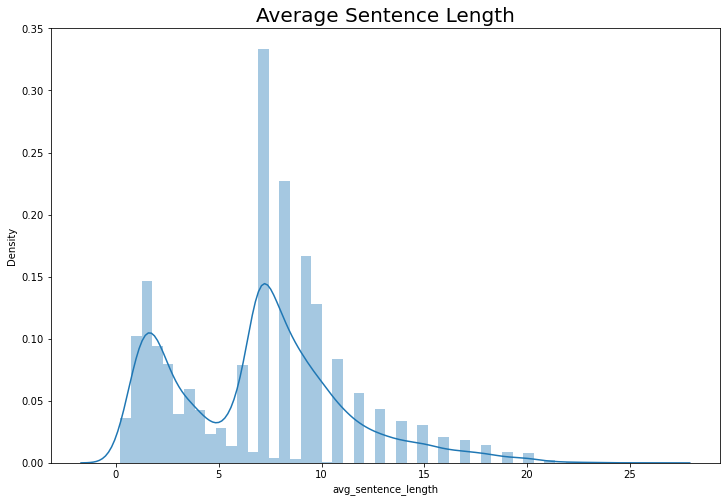

In [20]:
plt.figure(figsize=(12,8))
sns.distplot(df1['avg_sentence_length'])
plt.title("Average Sentence Length",fontsize=20)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average Word Length')

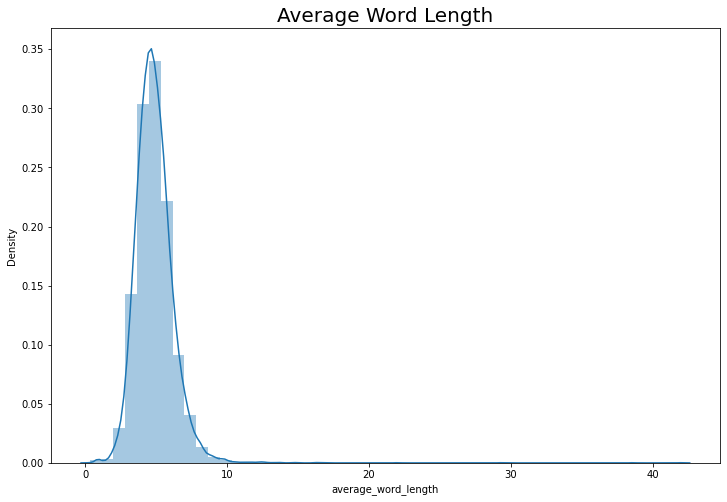

In [21]:
plt.figure(figsize=(12,8))
sns.distplot(df1['average_word_length'])
plt.title("Average Word Length",fontsize=20)

In [22]:
df1

,Category,Text,word_count,char_count,sentence_count,average_word_length,avg_sentence_length
0,Negative,This movei is just like ellam avan seyal,10,33,1,3.300000,10.00
1,Positive,Padam vanthathum 13k dislike pottavaga yellam...,15,72,1,4.800000,15.00
2,Positive,Neraya neraya neraya... ... V era level...thala,8,41,10,5.125000,0.80
3,Positive,wow thavala sema mass....padam oru pundaikum ...,8,46,5,5.750000,1.60
4,Negative,Andha 19 k unlike panavangaluku kolandha pora...,8,44,1,5.500000,8.00
...,...,...,...,...,...,...,...
15731,Positive,Looking young rajini Anna Fans from Telangana,8,39,1,4.875000,8.00
15732,Positive,Nee vaa thalaivaa ponggalukku naaga erukko,7,37,1,5.285714,7.00
15734,Positive,Rajini sir god of Indian cenima thalivaaaaaa ...,9,43,1,4.777778,9.00
15737,Positive,Again 1990 rajni sir cute look,7,25,1,3.571429,7.00


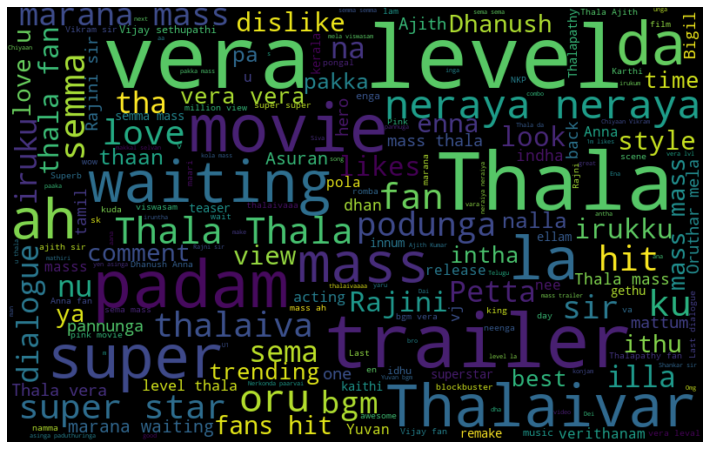

In [23]:
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in df['Text'][df['Category']=='Positive ']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

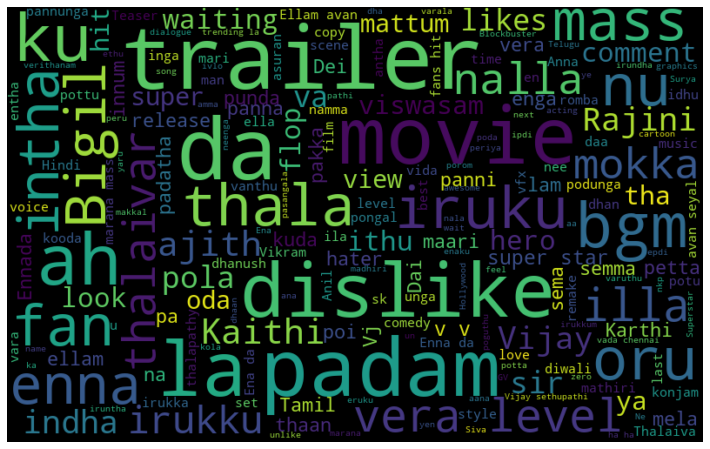

In [24]:
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in df['Text'][df['Category']=='Negative ']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
df['Category'].value_counts()

Positive           10559
Negative            2036
Mixed_feelings      1801
unknown_state        850
not-Tamil            497
Name: Category, dtype: int64

In [26]:
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

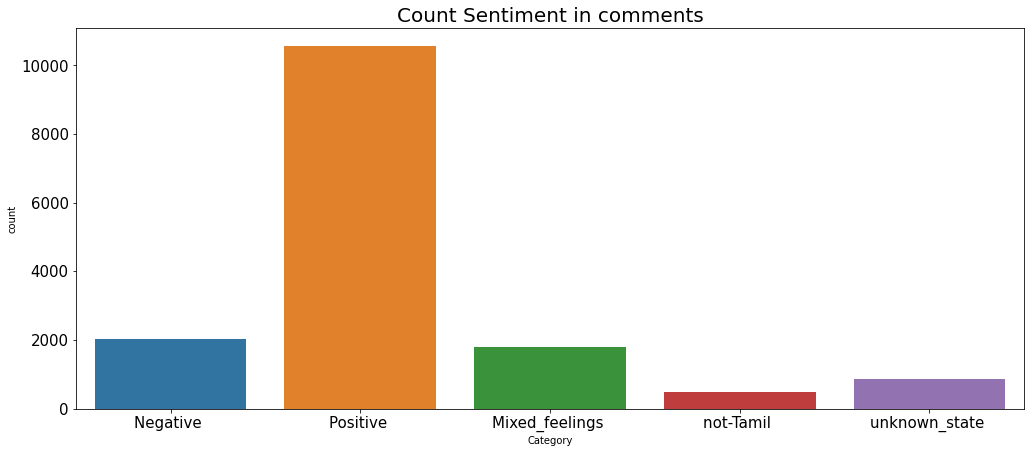

In [27]:
plt.figure(figsize=(17,7))
sns.countplot(df['Category'])
plt.title("Count Sentiment in comments",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

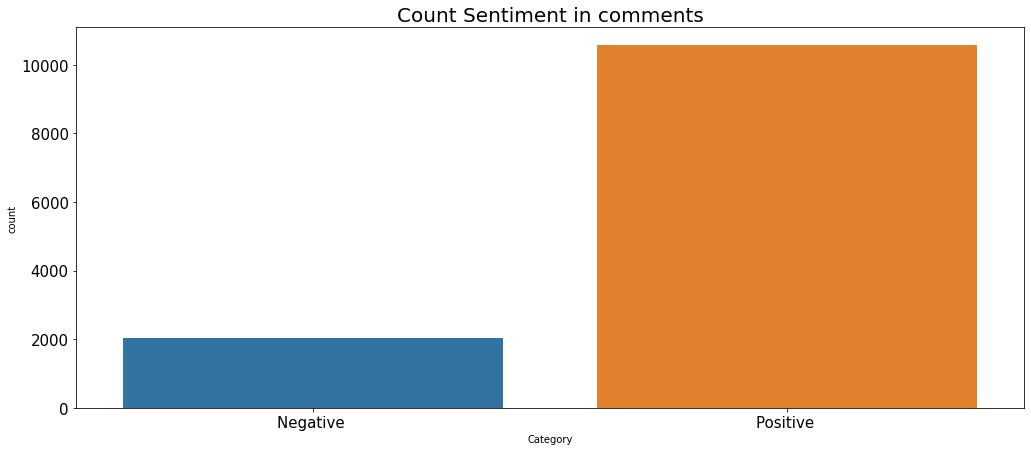

In [28]:
plt.figure(figsize=(17,7))
sns.countplot(df1['Category'])
plt.title("Count Sentiment in comments",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [29]:
df1['Category']=df1['Category'].replace({'Negative ':0,'Positive ':1})

<ipython-input-29-86530fa3cad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Category']=df1['Category'].replace({'Negative ':0,'Positive ':1})


In [30]:
df1['Category'].value_counts()

1    10559
0     2036
Name: Category, dtype: int64

In [31]:
df1.head(10)

,Category,Text,word_count,char_count,sentence_count,average_word_length,avg_sentence_length
0,0,This movei is just like ellam avan seyal,10,33,1,3.300000,10.0
1,1,Padam vanthathum 13k dislike pottavaga yellam...,15,72,1,4.800000,15.0
2,1,Neraya neraya neraya... ... V era level...thala,8,41,10,5.125000,0.8
3,1,wow thavala sema mass....padam oru pundaikum ...,8,46,5,5.750000,1.6
4,0,Andha 19 k unlike panavangaluku kolandha pora...,8,44,1,5.500000,8.0
5,1,Yaarellam frst like pottutu video paaka start...,10,58,5,5.800000,2.0
6,1,Ethana padam vanthanu SALT AND PEPPER Mattum ...,9,51,3,5.666667,3.0
7,1,Thala mass Hvy sprt kerala Surya anna fans,10,35,1,3.500000,10.0
8,0,Elam avan jayal movie remake pa,8,26,1,3.250000,8.0
9,1,Dhayavasenju indha padathula mass ila mayiru ...,18,100,5,5.555556,3.6


In [32]:
df1.shape

(12595, 7)

In [33]:
maxl=max([len(s) for s in df1['Text']])
maxl

514

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = CountVectorizer(analyzer = "word", 
                             preprocessor = None, 
                             stop_words =  'english', 
                             max_features = 10000,lowercase=True)
df1_features = vectorizer.fit_transform(df1['Text'])
tfidf_transformer = TfidfTransformer()
df1_features_tfidf = tfidf_transformer.fit_transform(df1_features)
df1_mat = df1_features_tfidf.toarray()

In [35]:
df1_mat.shape

(12595, 10000)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [37]:
X=tf.fit_transform(df1['Text'])

In [38]:
X

<12595x19614 sparse matrix of type '<class 'numpy.float64'>'
	with 99547 stored elements in Compressed Sparse Row format>

In [39]:
XX = X.todense()

In [40]:
XX[0:1]

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [41]:
XX.shape

(12595, 19614)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_new = XX

In [44]:
y_new = df1['Category'] 

In [45]:
X_train,X_test,y_train,y_test=train_test_split(XX,df1['Category'],test_size=0.3,random_state=42)

In [46]:
max([len(w) for w in df1['Text']])

514

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

In [ ]:
rf.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
LGB=LGBMClassifier()
LGB.fit(X_train,y_train)

In [ ]:
LGB.get_params()

In [ ]:
param={
    'boosting_type': ['gbdt','dart'],
    'n_estimators':[100,500],
    'importance_type': ['split','gain'],
}

In [ ]:
GRID = RandomizedSearchCV(estimator=LGB,scoring='accuracy',param_distributions=param,cv=5)
import warnings
warnings.filterwarnings('ignore')
GRID.fit(X_train,y_train)

In [ ]:
GRID.best_score_

In [ ]:
GRID.best_params_